<a href="https://colab.research.google.com/github/MarcusToledo/email-spam-classification-algorithms-comparison/blob/master/ml_spam_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [5]:
# Carregar o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_names = [
    'word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
    'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
    'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses',
    'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit',
    'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp',
    'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs',
    'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
    'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct',
    'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re',
    'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_;', 'char_freq_(',
    'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#', 'capital_run_length_average',
    'capital_run_length_longest', 'capital_run_length_total', 'label'
]
data = pd.read_csv(url, header=None, names=column_names)

# Selecionando os atributos
X = data.iloc[:, :-1].values  # Vou usar todos, o mínimo seria 7
y = data.iloc[:, -1].values  # Selecionado a última coluna 'label'

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Lista de modelos
models = {
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(12, 8), max_iter=1000, verbose=False)
}

# Armazenar os resultados
results = []

# Treinar e avaliar cada modelo
for model_name, model in models.items():
    model.fit(X_train, y_train)

    # Fazer previsões no conjunto de teste
    y_pred = model.predict(X_test)

    # Avaliar o modelo
    accuracy = accuracy_score(y_test, y_pred) * 100.0
    accuracy_non_normalized = accuracy_score(y_test, y_pred, normalize=False)
    report = classification_report(y_test, y_pred, output_dict=True)
    precision_avg = report['weighted avg']['precision']
    recall_avg = report['weighted avg']['recall']
    f1_score_avg = report['weighted avg']['f1-score']
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calcular True Positive Rate(TPR) e True Negative Rate(TNR)

    # TN -> True Negatives -> Número de verdadeiros negativos (Casos negativos
    # identificados como negativos)

    # TP -> True Positives -> Número de verdadeiros positivos (Casos positivos
    # identificados como positivos)

    # FP -> False Positives -> Número de falsos positivos (Casos negativos
    # classificados como positivos)

    # FN -> False Negatives -> Número de falsos negativos (Casos positivos
    # classificados como negativos)
    TN, FP, FN, TP = conf_matrix.ravel()
    TPR = TP / (TP + FN)
    TNR = TN / (TN + FP)

    # Formatar a matriz de confusão
    conf_matrix_df = pd.DataFrame(conf_matrix, index=['Real: Não-Spam', 'Real: Spam'], columns=['Previsto: Não-Spam', 'Previsto: Spam'])

    # Calcular a pontuação composta
    composed_score = (accuracy + precision_avg * 100 + recall_avg * 100 + f1_score_avg * 100 + TPR * 100 + TNR * 100) / 6

    # Armazenar os resultados
    results.append({
        "modelo": model_name,
        "acuracia": accuracy,
        "qt_acuracia": accuracy_non_normalized,
        "precision_avg": precision_avg,
        "recall_avg": recall_avg,
        "f1_score_avg": f1_score_avg,
        "TPR": TPR,
        "TNR": TNR,
        "composed_score": composed_score,
        "report": report,
        "matrix": conf_matrix_df,
        "y_test_shape": y_test.shape[0],
    })

In [7]:
# Ordenar os resultados por maior pontuação composta
results = sorted(results, key=lambda x: x["composed_score"], reverse=True)

# Exibir os resultados ordenados
for result in results:
    print(f"Modelo: {result['modelo']}")
    print(f"Acurácia: {result['acuracia']:.2f}%")
    print(f"Acurácia (quantidade amostras): {result['qt_acuracia']} / {result['y_test_shape']}")
    # print(f"Precisão Média: {result['precision_avg']:.2f}")
    # print(f"Recall Médio: {result['recall_avg']:.2f}")
    # print(f"F1-Score Médio: {result['f1_score_avg']:.2f}")
    # print(f"Taxa de Verdadeiro Positivo (TPR): {result['TPR']:.2f}")
    # print(f"Taxa de Verdadeiro Negativo (TNR): {result['TNR']:.2f}")
    print(f"Pontuação Composta: {result['composed_score']:.2f}")
    print("Relatório de Classificação:")
    print(pd.DataFrame(result["report"]).transpose())
    print("Matriz de Confusão:")
    print(result["matrix"])
    print("\n" + "="*60 + "\n")

Modelo: Random Forest
Acurácia: 95.01%
Acurácia (quantidade amostras): 875 / 921
Pontuação Composta: 94.86
Relatório de Classificação:
              precision    recall  f1-score     support
0              0.940109  0.975518  0.957486  531.000000
1              0.964865  0.915385  0.939474  390.000000
accuracy       0.950054  0.950054  0.950054    0.950054
macro avg      0.952487  0.945451  0.948480  921.000000
weighted avg   0.950592  0.950054  0.949859  921.000000
Matriz de Confusão:
                Previsto: Não-Spam  Previsto: Spam
Real: Não-Spam                 518              13
Real: Spam                      33             357


Modelo: Support Vector Machine
Acurácia: 93.49%
Acurácia (quantidade amostras): 861 / 921
Pontuação Composta: 93.30
Relatório de Classificação:
              precision    recall  f1-score     support
0              0.924324  0.966102  0.944751  531.000000
1              0.950820  0.892308  0.920635  390.000000
accuracy       0.934853  0.934853  0.93485

In [37]:
# Extrair os dados para variaveis
models = [result["modelo"] for result in results]
accuracies = [result["acuracia"] for result in results]
precision = [result["precision_avg"] for result in results]
recall = [result["recall_avg"] for result in results]
f1_score = [result["f1_score_avg"] for result in results]
scores = [round(result["composed_score"], 2) for result in results]
tpr = [round(result["TPR"], 2) for result in results]
tnr = [round(result["TNR"], 2) for result in results]

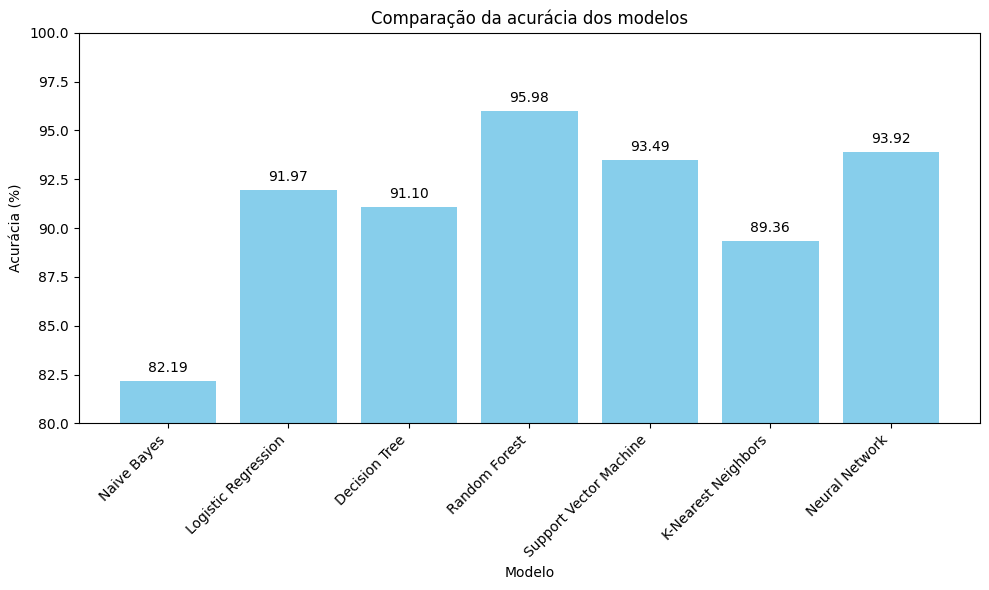

In [34]:
# Plotting Accuracy
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Modelo')
plt.ylabel('Acurácia (%)')
plt.title('Comparação da acurácia dos modelos')
plt.xticks(rotation=45, ha='right')
plt.ylim(80, 100)

# Adiciona os valores as barras
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.3, f'{accuracy:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

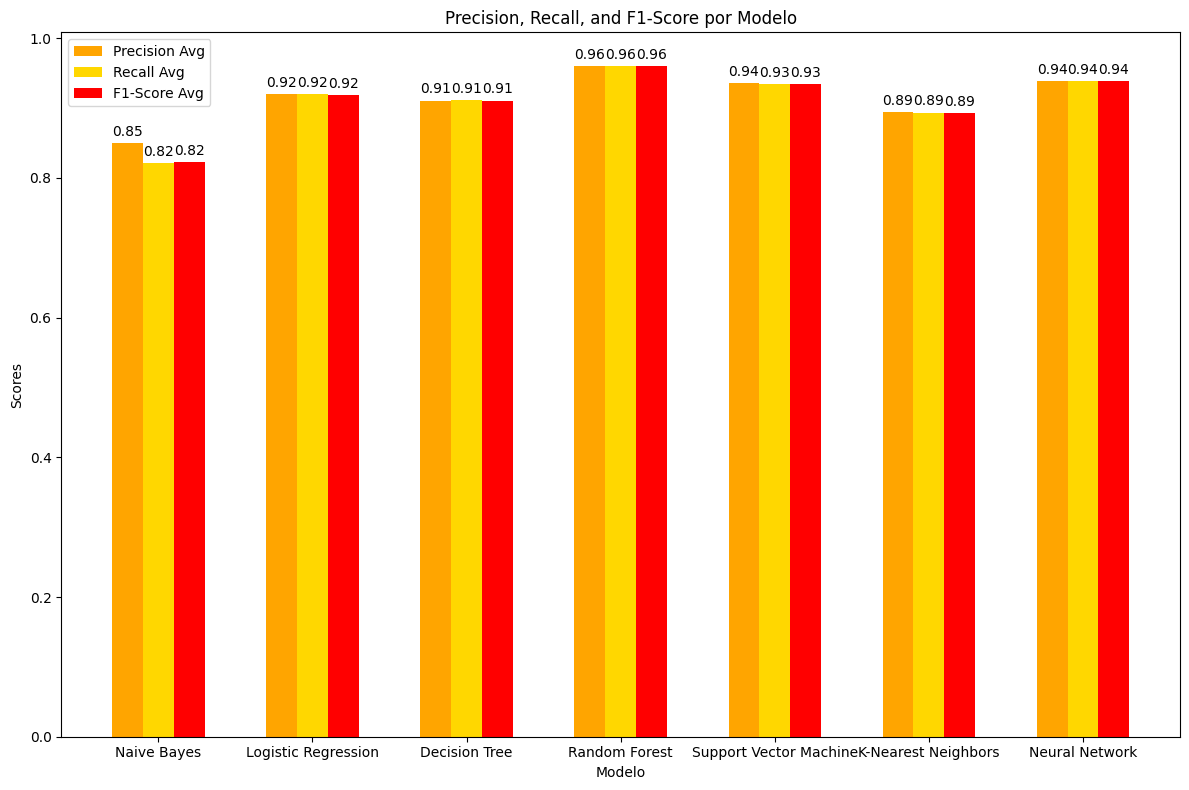

In [35]:
# Define cores melhores
precision_color = 'orange'
recall_color = 'gold'
f1_score_color = 'red'

# Plotting Precision, Recall, and F1-Score Averages
x = np.arange(len(models))  # the label locations
width = 0.2  # Width da barra

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, precision, width, label='Precision Avg', color=precision_color)
rects2 = ax.bar(x, recall, width, label='Recall Avg', color=recall_color)
rects3 = ax.bar(x + width, f1_score, width, label='F1-Score Avg', color=f1_score_color)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Modelo')
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-Score por Modelo')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate the bars with the scores
for rects in [rects1, rects2, rects3]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

fig.tight_layout()
plt.show()


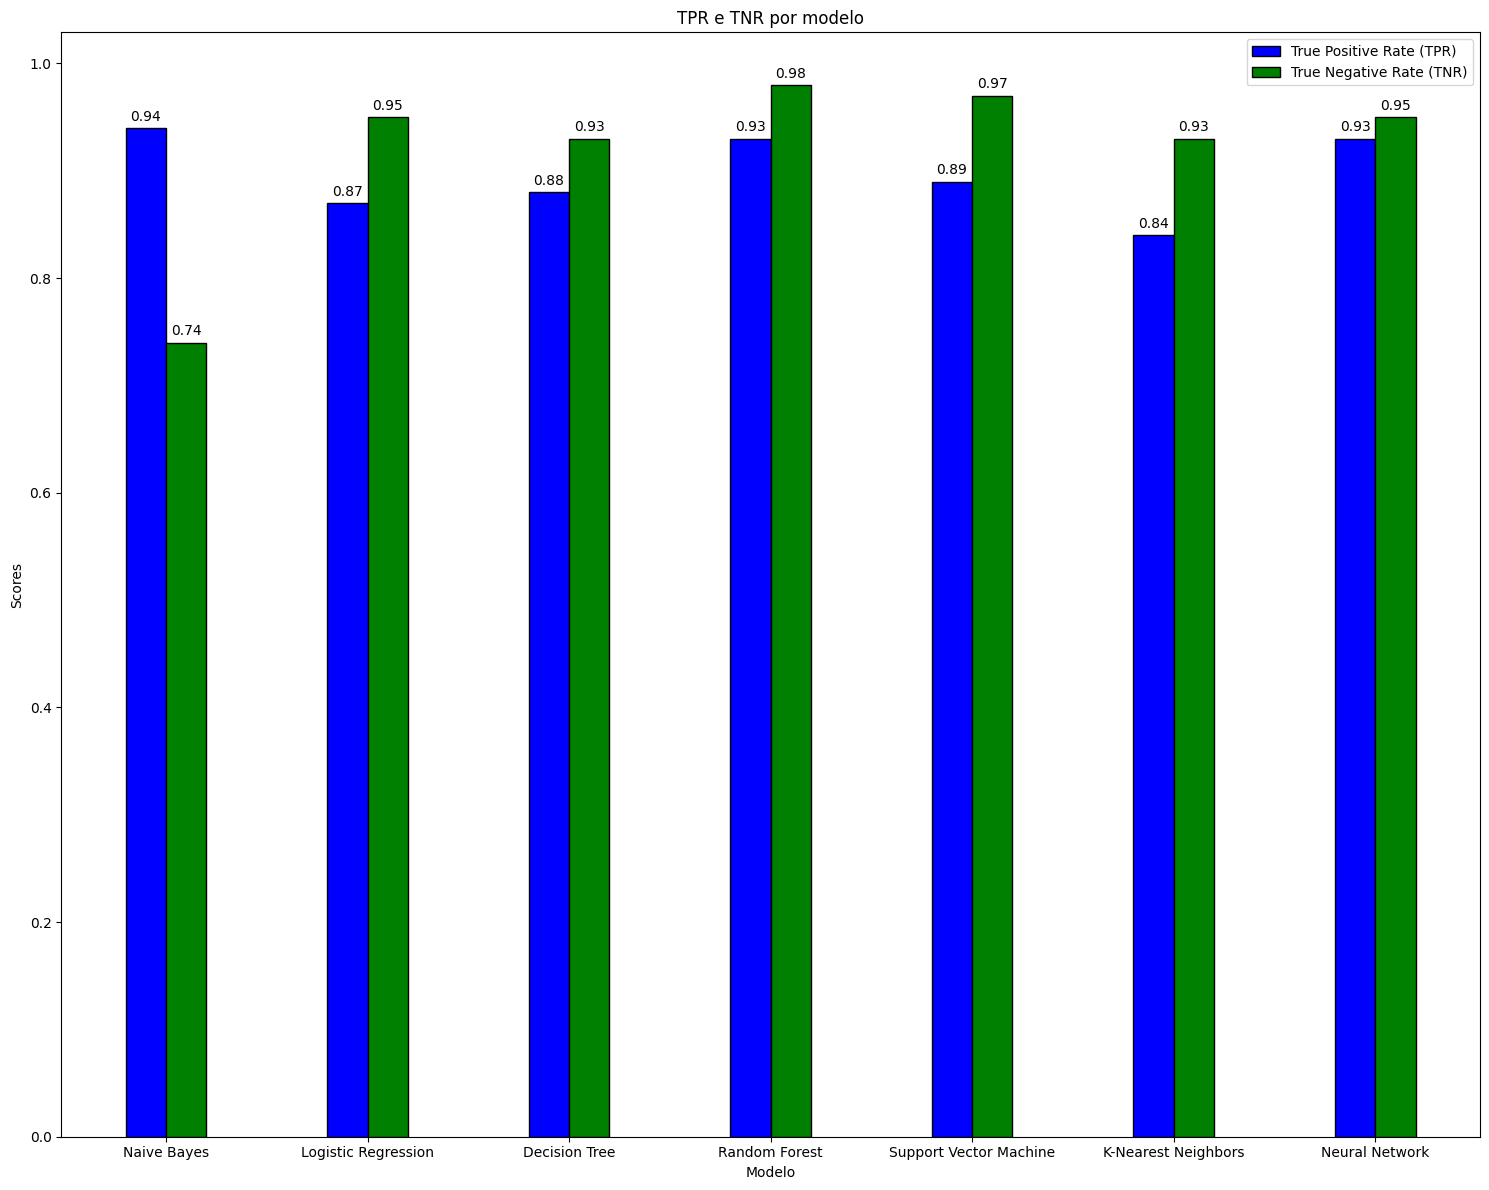

In [50]:
# Define colors
tpr_color = 'blue'
tnr_color = 'green'

# Plotting TPR e TNR
x = np.arange(len(models))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(15, 12))
rects1 = ax.bar(x - width / 2, tpr, width, label='True Positive Rate (TPR)', color=tpr_color, edgecolor='black')
rects2 = ax.bar(x + width / 2, tnr, width, label='True Negative Rate (TNR)', color=tnr_color, edgecolor='black')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Modelo')
ax.set_ylabel('Scores')
ax.set_title('TPR e TNR por modelo')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate the bars with the scores
for rects in [rects1, rects2]:
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

fig.tight_layout()
plt.show()


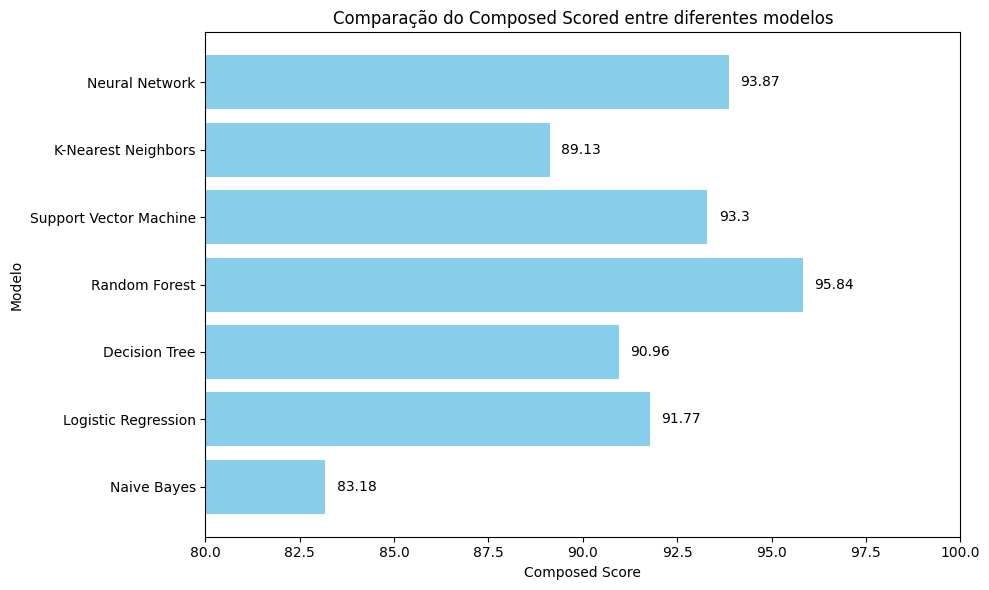

In [51]:
# Plotting composed_score em barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(models, scores, color='skyblue')
plt.xlabel('Composed Score')
plt.ylabel('Modelo')
plt.title('Comparação do Composed Scored entre diferentes modelos')
plt.xlim(80, 100)

# Annotate the bars with the composite scores
for i, score in enumerate(scores):
    plt.text(score + 0.3, i, str(score), va='center')

plt.tight_layout()
plt.show()
